In [6]:
import pandas as pd
import geopandas as gpd
import folium
import shapely.geometry as Point
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import cartopy
import requests

In [7]:
data = pd.read_csv("data/camden_wifi.csv")
data.head(2)

,Wi-Fi Name,Wi-Fi Type,Location Description,Range in Metres,Install Date,Install Type,Column Number,Road,Easting,Northing,Longitude,Latitude,Location,Range,Last Uploaded
0,Public Wi-Fi on Lighting Column 10 FORTESS ROAD,Public Wi-Fi,BY 57,30,19/12/2014,Lighting Column,10.0,FORTESS ROAD,529010.73,185548.16,-0.140543,51.554080,POINT (-0.140543114119 51.554079374825),"POLYGON ((-0.140110577594 51.554079315273, -0....",29/10/2018 02:53:47 PM
1,Public Wi-Fi on Lighting Column 18 CHALK FARM ...,Public Wi-Fi,O/S NO. 47,30,24/10/2014,Lighting Column,18.0,CHALK FARM ROAD,528466.45,184295.76,-0.148846,51.542949,POINT (-0.148846440464 51.54294823641),"POLYGON ((-0.148414009463 51.54294820746, -0.1...",29/10/2018 02:53:47 PM


In [8]:
data["Wi-Fi Type"].value_counts()

Wi-Fi Type
Public Wi-Fi            110
Shared Digital Guest      9
Name: count, dtype: int64

In [9]:
import pandas as pd
import folium
from folium.plugins import HeatMap


# Initialize map
map_camden = folium.Map(location=[51.5398, -0.1420], zoom_start=13)

# Add Wi-Fi hotspots
for _, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Name: {row['Wi-Fi Name']}<br>Type: {row['Wi-Fi Type']}<br>Range: {row['Range in Metres']}m",
        icon=folium.Icon(color="blue", icon="wifi", prefix="fa")
    ).add_to(map_camden)

# Add heatmap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in data.iterrows()]
HeatMap(heat_data).add_to(map_camden)

# Save map
map_camden.save("camden_wifi_map.html")

map_camden

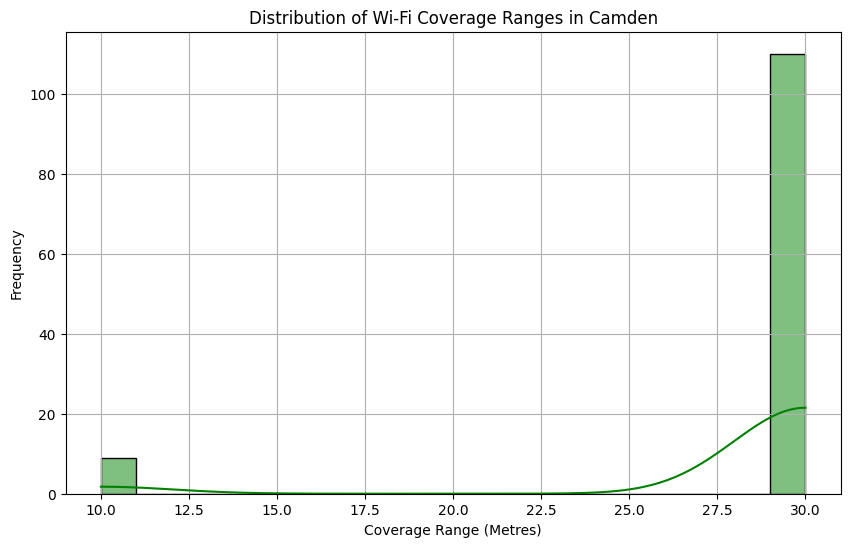

In [10]:
# Plot histogram of coverage ranges
plt.figure(figsize=(10, 6))
sn.histplot(data['Range in Metres'], kde=True, bins=20, color='green', edgecolor='black')
plt.title("Distribution of Wi-Fi Coverage Ranges in Camden")
plt.xlabel("Coverage Range (Metres)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("assets/coverage_range_histogram.png")
plt.show()


In [11]:
"""Analyzes Wi-Fi accessibility and identify gaps"""
avg_range = data['Range in Metres'].mean()
max_range = data['Range in Metres'].max()
min_range = data['Range in Metres'].min()
most_covered_road = data.groupby('Road')['Range in Metres'].sum().idxmax()
    
print(f"Average Wi-Fi Coverage Range: {avg_range:.2f} meters")
print(f"Max Wi-Fi Coverage Range: {max_range:.2f} meters")
print(f"Min Wi-Fi Coverage Range: {min_range:.2f} meters")
print(f"Road with Most Coverage: {most_covered_road}")

Average Wi-Fi Coverage Range: 28.49 meters
Max Wi-Fi Coverage Range: 30.00 meters
Min Wi-Fi Coverage Range: 10.00 meters
Road with Most Coverage: KENTISH TOWN ROAD


In [ ]:
# Initialize map centered around Camden
map_camden2 = folium.Map(location=[51.5398, -0.1420], zoom_start=13)

# Create a heatmap layer
heat_data = [[row['Latitude'], row['Longitude']] for _, row in data.iterrows()]
HeatMap(heat_data).add_to(map_camden2)

# Save the map with the heatmap
map_camden2.save("camden_wifi_accessibility_heatmap.html")
map_camden2